# A Simple Example of Clustering 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

Try with other numbers of clusters and see if they match your expectations. Maybe 7 is going to be a cool one!

Plot the data using the <i> c </i> parameter to separate the data by the clusters we defined.  

<i> Note: c stands for color <i>

## Import the relevant libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Countries.csv'</i>.


In [29]:
data = pd.read_csv('Countries-exercise.csv')
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

<function matplotlib.pyplot.show(*args, **kw)>

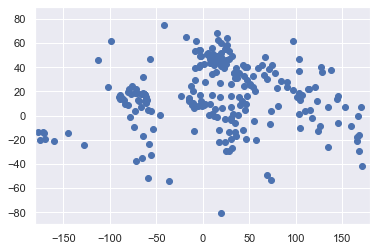

In [30]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show

## Select the features

Create a copy of that data and remove all parameters apart from <i>Longitude</i> and <i>Latitude</i>.

In [38]:
x = data.iloc[:,1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Clustering

Assume there are only two clusters. 

In [32]:
kmeans = KMeans(4)

In [33]:
kmeans.fit

<bound method KMeans.fit of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

### Clustering Resutls

In [34]:
identified_clusters_2 = kmeans.fit_predict(x)

In [26]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters_2
data_with_clusters

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,6
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,4
237,Yemen,47.586762,15.909280,6
238,South Africa,25.083901,-29.000341,3
239,Zambia,27.774759,-13.458242,3


Did you remember to use the <i> c </i> parameter to separate the data by the clusters we defined?

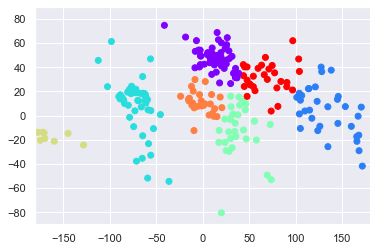

In [35]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

If you haven't, go back and play around with the number of clusters. 

Try 3, 7 and 8 and see if the results match your expectations!

In [36]:
kmeans.inertia_

256573.08675934302

In [39]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.52237055893,
 256573.08675934302,
 192194.9829002524,
 152164.15221066383,
 126973.14389753889,
 102913.99944185291,
 84945.19461239543,
 76845.18841695262]

In [40]:
number_clusters = range(1,11)

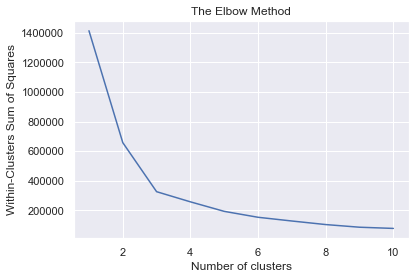

In [41]:
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Clusters Sum of Squares')
plt.show()

In [42]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
identified_clusters = kmeans.fit_predict(x)
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,1
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


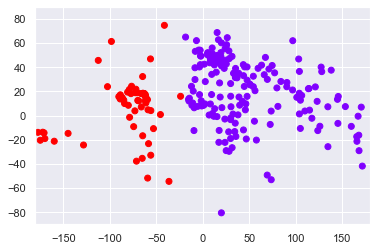

In [44]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [46]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
identified_clusters = kmeans.fit_predict(x)
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,0
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


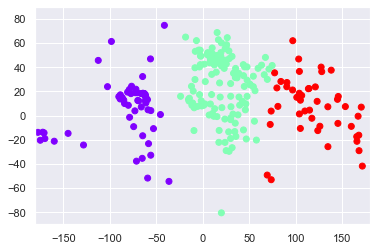

In [48]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()